In [ ]:
nvda_prices = yf.download('NVDA', period='max')
nvda_prices.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,0.437500,0.488281,0.388021,0.410156,0.376288,271468800
1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415709,51048000
1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383456,34320000
1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382261,24436800
1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381067,22752000


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6204 entries, 1999-01-22 to 2023-09-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6204 non-null   float64
 1   High       6204 non-null   float64
 2   Low        6204 non-null   float64
 3   Close      6204 non-null   float64
 4   Adj Close  6204 non-null   float64
 5   Volume     6204 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 339.3 KB
False
The percent difference between the close and adjusted close's respective means is -0.7015844185995335%


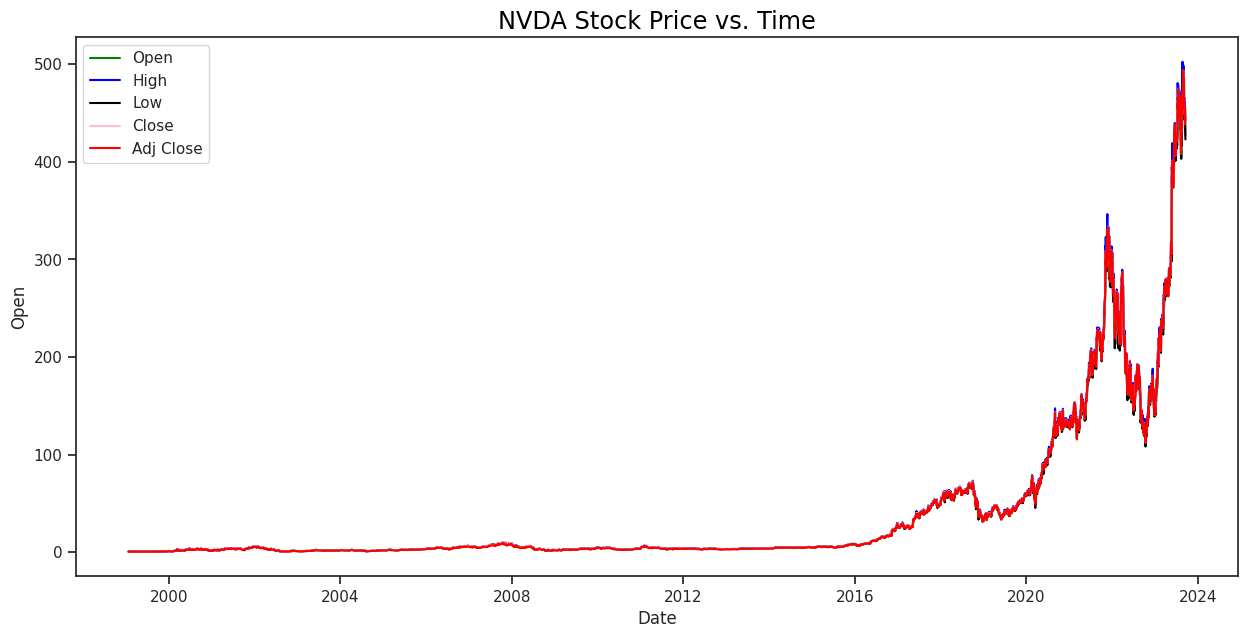

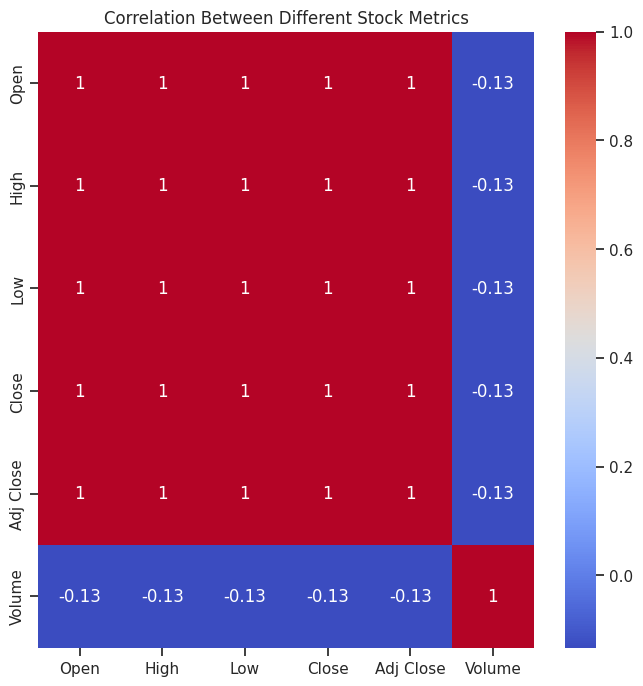

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Outlier % of Open: 13.49129593810445 %

Outlier % of High: 13.507414571244357 %

Outlier % of Low: 13.49129593810445 %

Outlier % of Close: 13.507414571244357 %

Outlier % of Adj Close: 13.507414571244357 %

Outlier % of Volume: 5.206318504190845 %



"\nAbout 13.4% of the dataset is considered an outlier, which seems excessively high, denoting that the distibution of the data\nis not normal, which is to be expected. Ultimately, this proves that NVDA's stock is especially volatile, which is evidenced\nvisually by the graph; although, the data supports that said volatility was mainly in 2022 due to Biden's sanctions on China.\n"

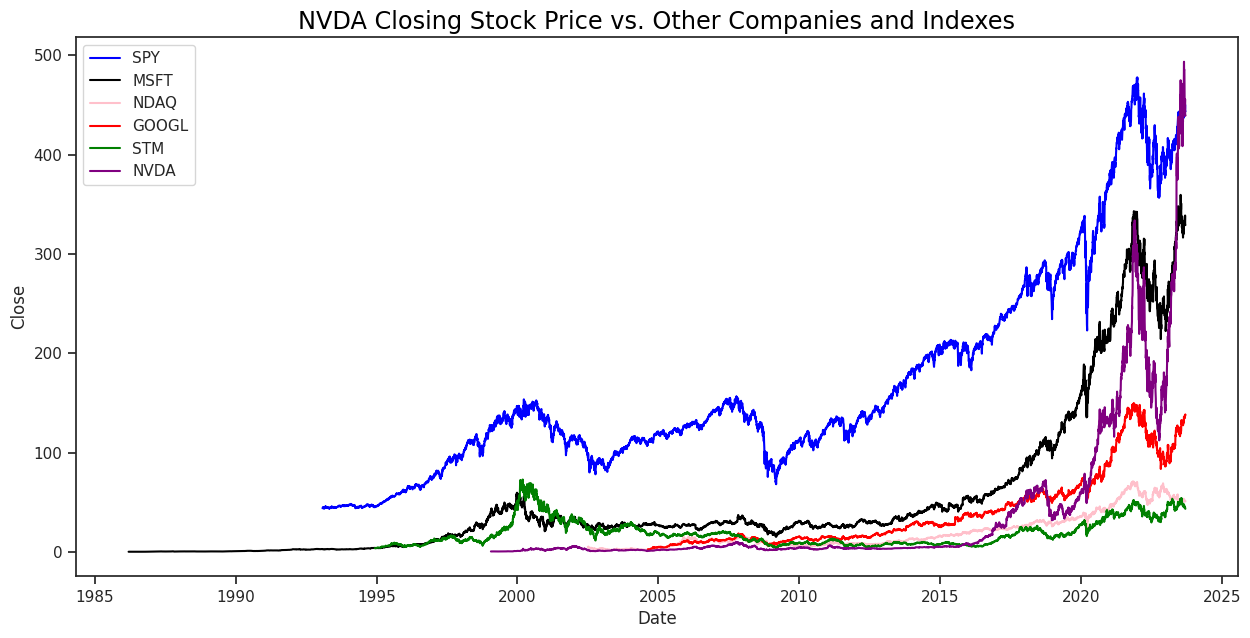

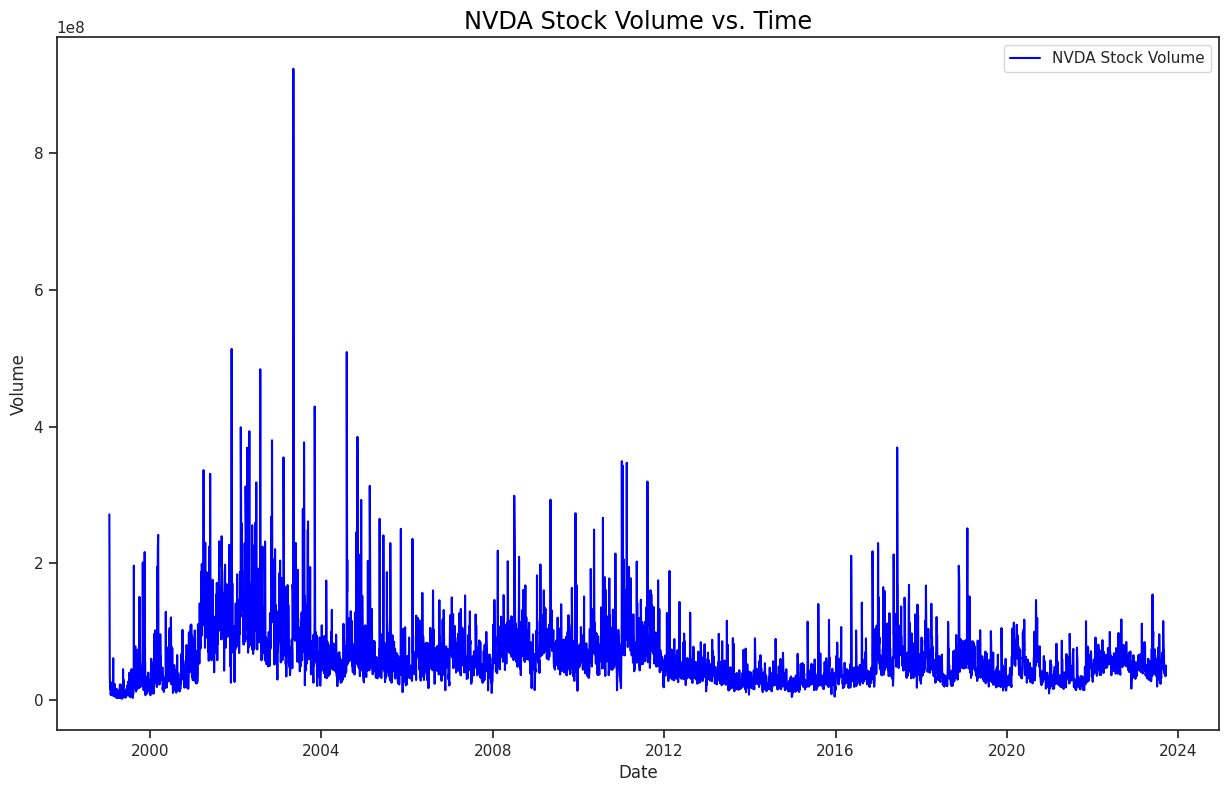

In [ ]:
"""
IMPORTANT INFO:
# is for comments explaining the code
The triple quotes is for my analysis of the data, so please don't skip over it!

Thank you!
😊😊😊
😊😊😊
"""




#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Obtaining info regarding the data, sorted by column
nvda_prices.info()

#Making sure the dataset is clean
print(nvda_prices.isnull().values.any()) #Checking if any value in the dataset is null (Expecting false)

#Obtaining the distribution of the data
nvda_prices.describe()

#The average difference between the Close and Adjusted Close values
percentDifference = (nvda_prices['Adj Close'].mean() - nvda_prices['Close'].mean())/nvda_prices['Close'].mean()*100 #percent error formula
print("The percent difference between the close and adjusted close's respective means is " + str(percentDifference) + "%")

#Graphing the stock prices, based on the various metrics (ex. Open), vs. time
#Design/Layout of graph
sns.set_theme()
plt.figure(figsize=(15,7)) #Size of graph
colors = ['blue', 'black', 'pink', 'red', 'green'] #Colors of each line
sns.set_style('ticks') #Style of axis

#Looping through each relevant column
for i in range(0, len(nvda_prices.columns)-1): #Volume will be graphed separately
  sns.lineplot(data=nvda_prices, x='Date', y=str(nvda_prices.columns[i]), label=str(nvda_prices.columns[i]), color=colors[i-1]) #Each lineplot represents a different column

#Title
plt.title('NVDA Stock Price vs. Time', size='x-large',color='Black') #Title of Graph

"""
We can immediately see thsn NVDA's stock has risen over time, boasting a particularly faster rate of growth at the turn of the decade.
It experienced a dip in 2022, but has witnessed monumental growth this year. Based on the obtained percent difference of ~0.7%, we can
also assume than NVDA's dividend distribution, stock splits, etc. changes the closing price by ~0.7% on average. Albeit small, this difference
is still significant enough where we cannot completely ignore the "Adj. Close" column.
"""

"""
Due to the visble overlaps between the various metrics, we can effectively assume than all metrics follow a similar trend over time,
ex. the opening price is not disproportionately more volatile than the closing price in the past 20 years.
"""

#Correlation Heatmap
corr = nvda_prices[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr() #calculate correlation
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Different Stock Metrics')
plt.show()

"""
The correlation heatmap supports the conclusion made earlier than all metrics follow a similar trend.
More specifically, the adjusted closing value and the opening value have the least correlation, which makes sense as the market
can shift rapidly in volatile ways over the course of the day, especially after dividend distributions are accounted for.
There is not a significant correlation between the volume of stocks traded and the price, with an r-value of only -.13.
The negative value indicates that high volume of trades may reduce the price of the stock, but an r-squared value of 0.017
demonstrates that volume is only responsible for ~2% of the dip in stock prices, making it in an insignificant metric.
"""

#Comparing NVDA's performance
#Downloading datasets
companyNames = ['SPY', 'MSFT', 'NDAQ', 'GOOGL', 'STM'] #Other companies and indexes
companyDatasets = {} #Dictionary of datasets
for i in companyNames:
  companyDatasets[i] = yf.download(i, period='max')

#Graphing Adjusted Closing Prices
plt.figure(figsize=(15,7)) #Size of graph
sns.set_style('ticks') #Style of axis

#Looping through each company
for i in range(len(companyNames)):
  sns.lineplot(data=companyDatasets[companyNames[i]], x='Date', y='Close', label=companyNames[i], color=colors[i])

#Graphing NVDA
sns.lineplot(data=nvda_prices, x='Date', y='Close', label='NVDA', color='purple')

#Title
plt.title('NVDA Closing Stock Price vs. Other Companies and Indexes',size='x-large',color='Black') #Title of Graph

"""
Macroeconomic trends have affected all the above companies/indexes similarly, which is why they dip and increase at the same time.
However, NVDA seems to be different in that it was more severely affected by Biden's sanctioning of chip exportation to China in 2022
compared to other companies, alluding to the fact that NVDA may be more dependent on demand in foreign markets than companies such as
Microsoft that are able to generate considerable revenue through domestic business. This graph is also a good indicator of how NVDA's
stock responds to macroeconomic factors.
"""

#Graphing Volume
plt.figure(figsize=(15,9))
sns.lineplot(data=nvda_prices, x='Date', y='Volume', label='NVDA Stock Volume', color='blue')
plt.title('NVDA Stock Volume vs. Time',size='x-large',color='Black') #Title of Graph

"""
Although highly volatile, the volume of stock traded today is not far from that of the end of the millenium.
There was a significant spike in 2003 and 2017, however.
"""

#Outliers

#Outlier Calculation Helper Method
def isOutlier(column, df, item, lowerBound, upperBound):
  if item < lowerBound or item > upperBound: #Outlier formula Q1 - 1.5*IQR & Q3 + 1.5*IQR
    return True
  return False

#Determining the % of data that are outliers
outliers = {}
for i in nvda_prices.columns: #Looping through each column
  iqr = nvda_prices[i].quantile(0.75) - nvda_prices[i].quantile(0.25) #Computing the IQR
  lowerBound = nvda_prices[i].quantile(0.25) - 1.5*iqr
  upperBound = nvda_prices[i].quantile(0.75) + 1.5*iqr
  numOfOutliers = 0
  for j in nvda_prices[i]: #Looping through each item in a column
    if isOutlier(i, nvda_prices, j, lowerBound, upperBound):
      numOfOutliers += 1 #Counting the number of outliers in each column
  outliers[i] = numOfOutliers/(len(nvda_prices[i]))*100

for i, j in outliers.items(): #
  print("Outlier % of " + str(i) + ": " + str(j) + " %\n") #Printing out the outlier percentages

"""
About 13.4% of the dataset is considered an outlier, which seems excessively high, denoting that the distibution of the data
is not normal, which is to be expected. Ultimately, this proves that NVDA's stock is especially volatile, which is evidenced
visually by the graph; although, the data supports that said volatility was mainly in 2022 due to Biden's sanctions on China.
"""

In [ ]:
#Basics
"""
Features: Various stock metrics and volume
Label: Adjusted closing price
"""

#Open-Close & Low-High
nvda_prices['Open-Close'] = nvda_prices['Open'] - nvda_prices['Close']
nvda_prices['Low-High'] = nvda_prices['Low'] - nvda_prices['High']
"""
It would be much more informative to know the difference between the opening and closing prices, as well as the lowest and highest price of the day
to see how the stock fluctuates each day.
"""

#Moving Average
nvda_prices['MA_5'] = nvda_prices['Close'].rolling(window=5).mean()
#The first 5 values can't have a 5-day moving averages, so I hardcoded the actual values
nvda_prices['MA_5'][0] = 0.410156
nvda_prices['MA_5'][1] = 0.453125
nvda_prices['MA_5'][2] = 0.417969
nvda_prices['MA_5'][3] = 0.41666
"""
It is important to see how the stock moves in periods of multiple days to avoid giving weight to fluctuations in 1 day.
"""

<ipython-input-4-a1dd86de34f0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvda_prices['MA_5'][0] = 0.410156
<ipython-input-4-a1dd86de34f0>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvda_prices['MA_5'][1] = 0.453125
<ipython-input-4-a1dd86de34f0>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvda_prices['MA_5'][2] = 0.417969
<ipython-input-4-a1dd86de34f0>:21: SettingWithCopyWarning: 
A value is trying to be set on a c

'\nIt is important to see how the stock moves in periods of multiple days to avoid giving weight to fluctuations in 1 day.\n'

Confidence:  0.9970728546391325
Root Mean Squared Error (RMSE): 5.595136495814635
Mean Absolute Error (MAE): 3.1420243359806674


"\nPros & Cons of the Model\n\nPros:\n- The model's r^2 value is approximately 1, meaning its predictive accuracy is extremely high.\n- The model is able to keep up with volatile data it hasn't seen before, meaning that the model probably isn't overfitting.\n\nCons:\n- The loss is high, which could mean that the model might not perform well on a day-to-day basis, even if it does well across\nlarge periods of time.\n"

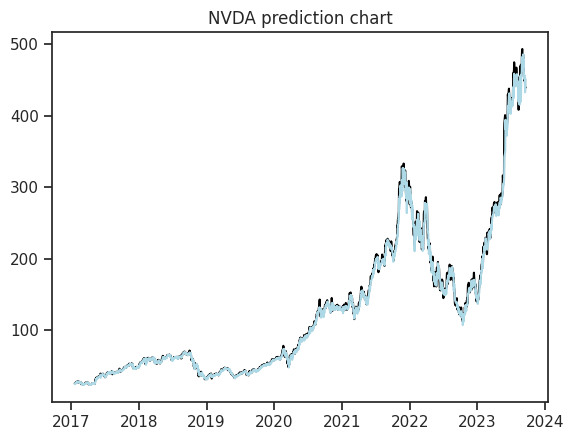

In [ ]:
#importing libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Splitting the Data
x = nvda_prices[['Low-High', 'Open-Close','MA_5', 'Volume']] #features
y = nvda_prices['Adj Close'] #label
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.27, shuffle=False,random_state=0) #0.27 was determined to be the optimal amount after many tests

#Linear Regression Model
regression = LinearRegression()
regression.fit(train_x, train_y)

#R^2 value
regression_confidence = regression.score(test_x, test_y)
print("Confidence: ", regression_confidence) #This represents the r^2 value
"""
The r^2, or confidence value is 0.997, which means that my model can predict 99.7% of the fluctuations in stock prices.
With test sizes of different amounts, this value decreases.
"""

#Checking error
predicted=regression.predict(test_x) #collection of predicted values
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(test_y, predicted))) #Error metric
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_y, predicted)) #Error metric

"""
Both error metrics are > 1, which is concerning, but given the volatility of NVDA's stock price as of
late, it's not a huge problem right now.
"""

#Graphing true values and predicted valyes
compare = pd.DataFrame({'Actual':test_y, 'Predicted':predicted})
plt.plot(compare.Actual, color='black') #Actual prices
plt.plot(compare.Predicted, color='lightblue') #P
plt.title("NVDA prediction chart")
"""
The graph offers a visual confirmation of the model's accuracy- both lines have considerable overlap, even when
NVDA's stock was increasing and decreasing rapidly.
"""

#Pros & Cons
"""
Pros & Cons of the Model

Pros:
- The model's r^2 value is approximately 1, meaning its predictive accuracy is extremely high.
- The model is able to keep up with volatile data it hasn't seen before, meaning that the model probably isn't overfitting.

Cons:
- The loss is high, which could mean that the model might not perform well on a day-to-day basis, even if it does well across
large periods of time.
"""

I recommend...

I recommend that Apex open up a position on NVDA, namely due the explosive growth it has witnessed in the last few months. There is much evidence to support that this growth is not merely short-term, as the primary reason for NVDA's stock's climb is the demand for AI-related services. NVDA's chips help power supercomputers- infrastructure that is highly sought after in the status quo. NVDA's response to economic turmoil is similar to that of comparable stocks and indexes, and I would argue that its performance is actually better due to its expertise in chips, something that has ubiquitous demand. One point of consideration would be NVDA's reliance on certain political conditions. The exploratory data analysis revealed that NVDA's plunge in 2022 was concurrent with Biden sanctioning companies from selling chips to China admist political tension between the two economic superpowers. However, as https://www.statista.com/statistics/988037/nvidia-revenue-by-country-region/ reports, even though China contributed more to NVDA's total revenue that the United States, in 2023, NVDA was able to compensate for their loss in Chinese markets, with revenue actually increasing depsite the reduced reliance on demand from China. Ultimately, I do not forsee NVDA's stock price falling in the next few years, unless the 2024 election coerces Biden to take measures against China to please the conservative base that has historically not voted for him in mass.